In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import os
import requests

# Loading Dataset: Geo-Referenced Carbon Emissions 🌍

In [2]:
url = 'https://datahub.io/core/co2-fossil-by-nation/r/fossil-fuel-co2-emissions-by-nation.csv'
nations_df = pd.read_csv(url)

## A Guided EDA Process 🚀🔍

Exploratory Data Analysis (EDA) is an essential step in any data science project, helping us understand, clean, and gain insights from our dataset. Here's a structured EDA process to guide your data exploration:

1. **Understand Column Meanings:** Begin by comprehending the meaning of each column in your dataset. Know what each attribute represents and its significance in your analysis. This provides context for your data.

2. **Check Data Integrity:** Ensure the integrity of your dataset by inspecting for missing values (NaNs) and outliers. Addressing data quality issues is crucial to reliable analysis.

3. **Visualize Distributions:** Utilize data visualization techniques to explore the distribution of individual variables. Tools like histograms, kernel density plots, and box plots can reveal insights into the data's spread and central tendencies.

4. **Pair Plots for Relationships:** Create pair plots to visualize relationships between pairs of variables. This matrix of scatter plots helps identify correlations and patterns, aiding in understanding the data's structure.

## Understand Column Meanings 📊

In [3]:
nations_df.head()

,Year,Country,Total,Solid Fuel,Liquid Fuel,Gas Fuel,Cement,Gas Flaring,Per Capita,Bunker fuels (Not in Total)
0,1751,UNITED KINGDOM,2552,2552,0,0,0,0,0.0,0
1,1752,UNITED KINGDOM,2553,2553,0,0,0,0,0.0,0
2,1753,UNITED KINGDOM,2553,2553,0,0,0,0,0.0,0
3,1754,UNITED KINGDOM,2554,2554,0,0,0,0,0.0,0
4,1755,UNITED KINGDOM,2555,2555,0,0,0,0,0.0,0


### Dataset Description 📗

This dataset contains geo-referenced information related to carbon emissions from various sources, including fossil fuel consumption and cement production. Below is a detailed description of the dataset columns:

1. **Year (1 - year):** The year of the recorded data.

2. **Country (2 - string):** The name of the nation or country corresponding to the emissions data.

3. **Total (3 - number):** Total carbon emissions from fossil fuel consumption and cement production, measured in million metric tons of carbon (C). This column represents the cumulative emissions.

4. **Solid Fuel (4 - number):** Carbon emissions specifically from solid fuel consumption.

5. **Liquid Fuel (5 - number):** Carbon emissions specifically from liquid fuel consumption.

6. **Gas Fuel (6 - number):** Carbon emissions specifically from gas fuel consumption.

7. **Cement (7 - number):** Carbon emissions from cement production.

8. **Gas Flaring (8 - number):** Carbon emissions from gas flaring activities.

9. **Per Capita (9 - number):** Per capita carbon emissions, measured in metric tons of carbon. This column provides the emissions per person, and data is available starting from the year 1949.

10. **Bunker Fuels (Not in Total) (10 - number):** Carbon emissions from bunker fuels, which are not included in the total emissions calculation.

This dataset is a valuable resource for analyzing carbon emissions patterns, both globally and at the country level, over time. Researchers and analysts can utilize this data to study the impact of various factors on carbon emissions and to develop insights into environmental trends and policies.


## Check Data Integrity 🔍

In [4]:
# Check for missing values
missing_values = nations_df.isnull().sum()

# Display the count of missing values for each column
print("Missing Values Summary:")
print(missing_values)

Missing Values Summary:
Year                           0
Country                        0
Total                          0
Solid Fuel                     0
Liquid Fuel                    0
Gas Fuel                       0
Cement                         0
Gas Flaring                    0
Per Capita                     0
Bunker fuels (Not in Total)    0
dtype: int64


We are good to go! No missing values.

## Visualize Distributions 📈

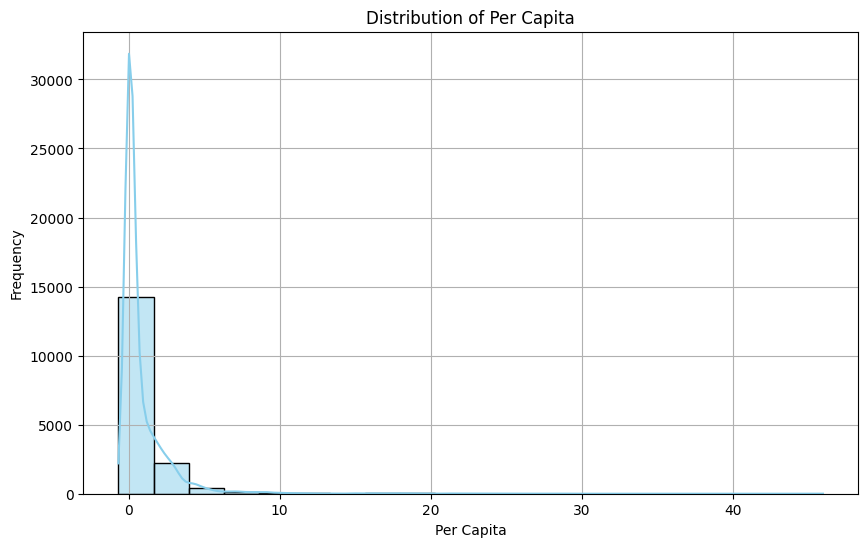

In [5]:
# Select the column you want to analyze (replace 'Per Capita' with the actual column name)
column_to_analyze = 'Per Capita'

# Create a distribution plot (histogram) to visualize the data
plt.figure(figsize=(10, 6))
sns.histplot(nations_df[column_to_analyze], kde=True, bins=20, color='skyblue')
plt.title(f'Distribution of {column_to_analyze}')
plt.xlabel(column_to_analyze)
plt.ylabel('Frequency')
plt.grid(True)

# Show the plot
plt.show()


## Pair Plots for Relationships 🔄

<ipython-input-6-3a7258f4918c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(nations_df.corr())


<Axes: >

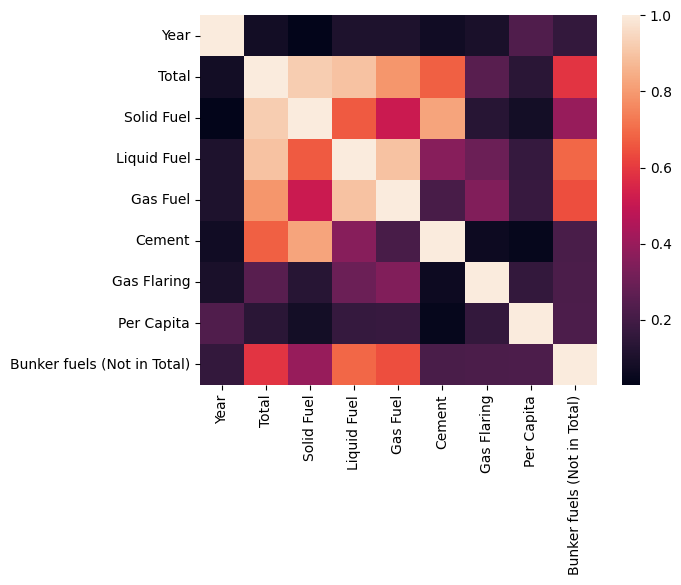

In [6]:
sns.heatmap(nations_df.corr())
# Question: should we plot the correlation of all the columns?

## Understanding a Time Series

In this code example, we'll explore how to visualize and understand a time series using Python's Matplotlib and Seaborn libraries. We'll focus on plotting carbon emission data over time.

### Setting the Matplotlib Canvas

First, we set up the Matplotlib canvas by creating a figure (`fig`) and an axes (`ax`) to plot our data.

### Optional: Querying the Data

If needed, we can query the data to select a specific time period. In this example, we select all rows where the 'Year' column has a value greater than or equal to 1920.

### Optional: Data Aggregation

We can also evaluate the mean values for each year in the selected time period and create a new DataFrame with these aggregated values. This step can be useful when you want to plot aggregated data over time.

### Plotting the Time Series

Finally, we use Seaborn's `lineplot` function to create line plots for different carbon emission categories over time. In this code, we plot the 'Total' emissions, 'Solid Fuel' emissions, 'Liquid Fuel' emissions, and 'Gas Fuel' emissions. Each line represents a different category, making it easy to visualize trends and patterns over the specified time period.

<ipython-input-16-54540066952e>:8: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  query_df = query_df.groupby('Year').mean()


<Axes: xlabel='Year', ylabel='Total'>

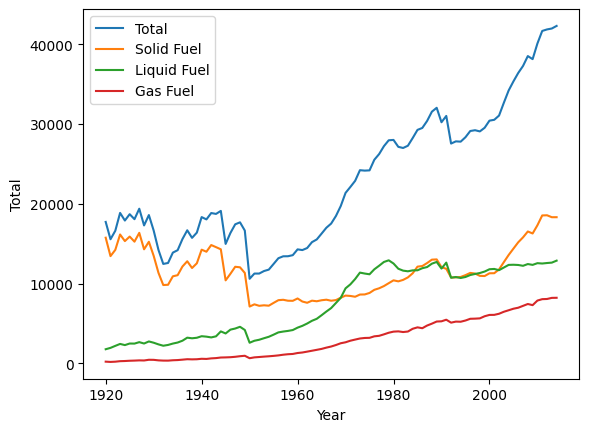

In [16]:
# Set the matplotlib canva
fig, ax = plt.subplots()

# Optional: Query the data by year: selects all rows in which the 'Year' column has a value greater than or equal to 1920
query_df = nations_df[nations_df['Year'] >= 1920]

# Optional: evaluate the mean once for all and then plot
query_df = query_df.groupby('Year').mean()

# Plot the time series
sns.lineplot(data=query_df, x='Year', y='Total', ax=ax, legend='brief', label='Total')
sns.lineplot(data=query_df, x='Year', y='Solid Fuel', ax=ax, legend='brief', label='Solid Fuel')
sns.lineplot(data=query_df, x='Year', y='Liquid Fuel', ax=ax, legend='brief', label='Liquid Fuel')
sns.lineplot(data=query_df, x='Year', y='Gas Fuel', ax=ax, legend='brief', label='Gas Fuel')


# Plot Geo-Referenced Data with Geopandas 🗺️
Geopandas is a powerful Python library that extends the capabilities of Pandas to handle spatial data. It provides an easy way to work with geospatial datasets, such as shapefiles and GeoDataFrames, allowing you to explore, analyze, and visualize geographic information seamlessly. With Geopandas, you can create maps, perform spatial operations, and overlay different layers of geographical data effortlessly.

In this tutorial, we'll explore how to use Geopandas to plot geo-referenced data on maps. We'll demonstrate how to load a world map, extract geometries (coordinates) of countries, and display data using Matplotlib.

Let's get started with the code!



In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Load a world map shapefile or GeoDataFrame (you may need to download this dataset)
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
available_countries = world['name'].unique()

# Select the year you want to analyze
year_to_plot = 2000
column_to_plot = 'Gas Fuel'
# Filter the data for the selected year
data_for_year = nations_df[nations_df['Year'] == year_to_plot]

# Plot the world map
world.plot(figsize=(12, 8), color='lightgray', edgecolor='k')

min_col = data_for_year[column_to_plot].min()
max_col = data_for_year[column_to_plot].max()
# Plot balloons at each country's location with size based on 'Per Capita'
for idx, row in data_for_year.iterrows():
    country = row['Country'].title()
    if country not in available_countries: continue
    value = row[column_to_plot]
    value_normalized = (value - min_col) / (max_col - min_col)
    # Find the geometry (coordinates) for the country in the world map

    geometry = world[world['name'] == country]['geometry'].values[0]

    # Extract latitude and longitude from the geometry
    lon, lat = geometry.centroid.xy

    # Plot a circle (balloon) with size based on 'Per Capita'
    plt.scatter(lon, lat, s=value_normalized * 75, color='blue', alpha=0.5)

# Set plot title and labels
plt.title(f'Carbon Emissions Per Capita in {year_to_plot}')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Show the plot and save
plt.show()
plt.savefig(f'year_{year_to_plot}.pdf')